<a href="https://colab.research.google.com/github/tedysetiadi/Community-Detection-Alogrithms-Evaluation/blob/master/Eval_library_graph_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied SNA and Community Detection for Library

In [6]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 27.2 MB/s 


In [7]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 29.1 MB/s 
     |████████████████████████████████| 3.1 MB 67.4 MB/s 
  Attempting uninstall: igraph
    Found existing installation: igraph 0.10.1
    Uninstalling igraph-0.10.1:
      Successfully uninstalled igraph-0.10.1


In [8]:
#utility

import pandas as pd
import igraph as ig
import networkx as nx
import networkx.algorithms.community as nx_comm
from igraph import *
import matplotlib as plt
import leidenalg as la
import community
from community import community_louvain
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
from operator import itemgetter
import numpy as np
# entropy: evaluation metric for attributed graph  
def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))
    return - probs.dot(np.log2(probs))

#convert list of frozen=[frozenset({32, 33, 8, 14}), frozenset({1, 2, 3})
# to com ={0: [32, 33, 8, 1 31], 1: [1, 2, 3, 7, 9, 1]}
def frozen2com(froz):
  com=dict()
  for i in range(len(froz)):
    com[i]=list(froz[i])
  return(com)

def com2lsetcom(com):
#convert com={0:[0,1,2],1:[3,4]} menjadi lsetcom=({0,1,2},{3,4})
    lsetcom=[]
    for key,val in com.items() :
      x=set(val)
      lsetcom.append(x)
    return lsetcom
#convert mem={0,0,0,1,1,3} topart={0:0,1:0,2:0,3:1,4:1,5:3}
def mem2part(mem):
  part=dict()
  for i in range(len(mem)):
    part[i]=mem[i]
  return(part)

def part2com(part):
#convert part={0:0,1:0,2:0,3:1,4:1,5:3} to com={0:[0,1,2],1:[3,4],3:[5]) 
    com=dict()
    for val in range(0,len(set(part.values()))):
        #list.append(get_node(part,i))
        el=[]
        for (i,j) in part.items():
            if j==val : 
                el.append(i)
        com[val]=el
    return com

def com2part(com):
#convert com={0:[0,1,2],1:[3,4],3:[5]) to part={0:0,1:1,2:0,3:1,4:1,5:3}
    part=dict()
    for k,v in com.items():
        for el in v :
            part[el]=k 
    return(part)

def part2mem(part):
  mem=[]
  for k,v in part.items():
    mem.append(v)
  return(mem)

def mem2com(mem):
  r=mem2part(mem)
  res=part2com(r)
  return(res)

def com2mem(com):
  x=com2part(com)
  res=part2mem(x)
  return(res)

# convert list_list=[[0,1],[2,3,4] to com={0: [0, 1], 1: [2, 3, 4]}
def list_list2com(lab):
  com={}
  for i in range(len(lab)):
    com[i]=lab[i]
  return(com)

def obj_com2lab(obj_com): 
  lab=[]
  for i in obj_com :
    lab.append(list(i))
  return(lab)

# convert list_set =[{0, 1}, {2,3,4}] to list_list=[[0,1],[2,3,4]
def list_set2list_list(l):
  list_list=[]
  for el in l:
    #print(el)
    list_list.append(list(el))
  return (list_list)

def plot_degree_dist(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.hist(degrees)
    plt.show()
def max_degree(g):
    max_degree=-1
    for i in g.nodes :
        if (g.degree[i]> max_degree):
            max_degree=g.degree[i]
    return max_degree
def min_degree(g):
    min_degree=9999
    for i in g.nodes :
        if (g.degree[i]< min_degree):
            min_degree=g.degree[i]
    return min_degree
def avg_degree(g):
    sum=0
    for i in g.nodes :
        sum=sum+g.degree[i]
    return sum/len(g)

def Most_top_students(g,n):
    degree_dict=dict(g.degree(g.nodes()))
    nx.set_node_attributes(g,degree_dict,'degree')
    attr=nx.get_node_attributes(gstudents,"attr")
    sorted_degree=sorted(degree_dict.items(),key=itemgetter(1),reverse=True)
    print("Most top students : ")
    for x,y in sorted_degree[:n]:
        print("The students no :",x,",degree:",y,",departement :",attr[x])
  
def Five_top_degree_NA(g):
    degree_dict=dict(g.degree(g.nodes()))
    nx.set_node_attributes(g,degree_dict,'degree')
    sorted_degree=sorted(degree_dict.items(),key=itemgetter(1),reverse=True)
    print(" 5 top nodes by degree")
    for x,y in sorted_degree[:5]:
        x1=get_key(mapping,x)
        print(x1,y) 
def property_network_NA(g) :
    print("number of edges :",nx.number_of_edges(g))
    print("number of nodes :",nx.number_of_nodes(g))
    print("density :{:.2f}".format(nx.density(g)) )
    print("diameter :",nx.diameter(g) )
    print("maximum degree :",max_degree(g) )
    print("minimum degree :",min_degree(g) )
    print("Average degree :{:.2f}".format(avg_degree(g)))
    print("Assortativity :{:.2f}".format(nx.degree_assortativity_coefficient(g)))
    r=sum(nx.triangles(g).values()) / 3
    print("Number of triangles",r)
    #print("Maximum k-core:",nx.core_number(g))
    #print("Degree centrality :",nx.degree_centrality(g))
    print(Five_top_degree_NA(g))

def property_network(g) :
    print("number of edges :",nx.number_of_edges(g))
    print("number of nodes :",nx.number_of_nodes(g))
    print("density :{:.2f}".format(nx.density(g)) )
    print("diameter :",nx.diameter(g) )
    print("maximum degree :",max_degree(g) )
    print("minimum degree :",min_degree(g) )
    print("Average degree :{:.2f}".format(avg_degree(g)))
    print("Assortativity :{:.2f}".format(nx.degree_assortativity_coefficient(g)))
    r=sum(nx.triangles(g).values()) / 3
    print("Number of triangles",r)
    #print("Maximum k-core:",nx.core_number(g))
    #print("Degree centrality :",nx.degree_centrality(g))
    print(Five_top_degree(g))

def part2com(part):
    com=dict()
    for val in range(0,len(set(part.values()))):
        #list.append(get_node(part,i))
        el=[]
        for (i,j) in part.items():
            if j==val : 
                el.append(i)
        com[val]=el
    return com
def min_length_com(x):
    return min([len(n) for n in x.values()])
def max_length_com(x):
    return max([len(n) for n in x.values()])
def avg_length_com(x):
    return (sum([len(n) for n in x.values()])/len(x))
def get_key(d,v): # the value is passed to the function
    #(i,j) pair key:values
    for (i,j) in d.items():
        if j == v:
            return i
def Most_student_populer(g,n):
  degree_dict=dict(g.degree(g.nodes()))
  nx.set_node_attributes(g,degree_dict,'degree')
  sorted_degree=sorted(degree_dict.items(),key=itemgetter(1),reverse=True)
  print(n, "  most student populer :")
  for x,y in sorted_degree[:n]:
      print(x,y) 

In [10]:
def readdata():
    gstudent=nx.read_gml("/content/sample_data/graph_student.gml")
    return gstudent
gstudent=readdata()

#Evaluation Metrics Gstudents

In [11]:
#complete

import networkx.algorithms.community as nx_comm
#louvain
print("Louvain ")
partlou = community_louvain.best_partition(gstudent)
com=part2com(partlou)
partition=com2lsetcom(com)
sizelou=len(com)
modlou=community_louvain.modularity(partlou,gstudent)
labels=[y for x,y in partlou.items()]
elou=entropy(labels)
covrglou=nx_comm.coverage(gstudent,partition)
performlou=nx_comm.performance(gstudent,partition)
dlou=[]
for i in range(sizelou):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom) 
  dl=nx.density(gcom)
  dlou.append(dl)
print("density lou :",dlou)
avgdlou=np.average(dlou) 
print("size community :",sizelou)
print("modularity  : ",modlou)
print("coverage :",covrglou)
print("performance:",performlou)
print("entropi:",elou)
print("avg density:",avgdlou)


#greedy_modularity_communities algorithm
print("Greedy")
comk=nx_comm.greedy_modularity_communities(gstudent)
com=frozen2com(comk)
part=com2part(com)
labels=[y for x,y in part.items()]
egre=entropy(labels)
modgre=nx_comm.modularity(gstudent,comk)
performgre=nx_comm.performance(gstudent,comk)
covrggre=nx_comm.coverage(gstudent,comk)
sizegre=len(comk)
dgre=[]
for i in range(sizegre):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom) 
  dg=nx.density(gcom)
  dgre.append(dg)
avgdgre=np.average(dgre) 
print("size Greey CN:",sizegre)
print("modularity Greey CN:",modgre)
print("coverage :",covrggre)
print("performance:",performgre)
print("entropy greedy :",egre)
print("avg density:",avgdgre)


#LPA
print(" LPA ")
coml=nx_comm.label_propagation_communities(gstudent)
lcom=[i for i in coml]
ll=list_set2list_list(lcom)
com=list_list2com(ll)
part=com2part(com)
labels=[y for x,y in part.items()]
elpa=entropy(labels)
modlpa=nx_comm.modularity(gstudent,lcom)
sizelpa=len(lcom)
covrglpa=nx_comm.coverage(gstudent,lcom)
performlpa=nx_comm.performance(gstudent,lcom)
sizegre=len(com)
dlpa=[]
for i in range(sizegre):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom)
  dl=nx.density(gcom)
  dlpa.append(dl)
avgdlpa=np.average(dlpa) 
print("size com:",sizelpa)
print("modularity LPA:",modlpa)
print("performance:",performlpa)
print("coverage :",covrglpa)
print("entropy :",elpa)
print("density :",avgdlpa)

#Kernighan_Lin Bisection algorithm
print("Ker-Lin")
comk=nx_comm.kernighan_lin_bisection(gstudent)
sizeker=len(list(comk))
modker=nx_comm.modularity(gstudent,comk)
covrgker=nx_comm.coverage(gstudent,comk)
performker=nx_comm.performance(gstudent,comk)
ll=list_set2list_list(list(comk))
com=list_list2com(ll)
part=com2part(com)
labels=[y for x,y in part.items()]
eker=entropy(labels)
dker=[]
for i in range(sizeker):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom) 
  dk=nx.density(gcom)
  dker.append(dk)
avgdker=np.average(dker) 
print("modularity Kernighan:",modker)
print("len com Ker-lin :",len(list(comk)))
print("coverage kernighan :",covrgker)
print("performance kernighan :",performker)
print("entropy :",elpa)
print("density :",avgdlpa)


#Fluid Communities algorithm
print("Fluid")
import networkx.algorithms.community as nx_comm
comflu=nx_comm.asyn_fluidc(gstudent,2)
z=list(comflu)
#print(type(comf))
ll=list_set2list_list(z)
com=list_list2com(ll)
part=com2part(com)
labels=[y for x,y in part.items()]
eflu=entropy(labels)
sizeflu=len(z)
dflu=[]
for i in range(sizeflu):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom) 
  df=nx.density(gcom)
  dflu.append(df)
avgdflu=np.average(dflu) 
modflu=nx_comm.modularity(gstudent,nx_comm.asyn_fluidc(gstudent,2))
covrgflu=nx_comm.coverage(gstudent,z)
performflu=nx_comm.performance(gstudent,z)
print("modularity fluid algorithm :",modflu)
print("size com fluid :",sizeflu)
print("coverage fluid algo :",covrgflu)
print("performance fluid algo :",performflu)
print("entropy fluid algo :",eflu)
print("avg density fluid algo :",avgdflu)


#Girvan_newman ALgorithm
print("Girvan Newman ")
import networkx.algorithms.community as nx_comm
comg=nx_comm.girvan_newman(gstudent)
top_level_com=next(comg)
ll=list_set2list_list(top_level_com)
com=list_list2com(ll)
part=com2part(com)
labels=[y for x,y in part.items()]
egir=entropy(labels)
sizegir=len(top_level_com)
dgir=[]
for i in range(sizegir):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom) 
  dg=nx.density(gcom)
  dgir.append(dg)
avgdgir=np.average(dgir) 
modgir=nx_comm.modularity(gstudent,top_level_com)
covrggir=nx_comm.coverage(gstudent,top_level_com)
performgir=nx_comm.performance(gstudent,top_level_com)
print("modularity girvan_newman :",modgir)
print("len com GN :",len(top_level_com))
print("coverage girvan_newman :",covrggir)
print("perform girvan_newman :",performgir)
print("entropy girvan_newman :",egir)
print("avg density girvan_newman :",avgdgir)


Louvain 
density lou : [0.28888888888888886, 0.6666666666666666, 0.17195767195767195, 0.27472527472527475, 0.13790970933828076, 0.1794871794871795, 0.13277428371767994, 0.16312056737588654, 0.36363636363636365, 1.0, 0.3333333333333333, 0.42857142857142855, 0.0893707033315706, 0.34502923976608185, 0.42857142857142855, 0.5]
size community : 16
modularity  :  0.7033145146197789
coverage : 0.8685868586858686
performance: 0.9082702206046334
entropi: 3.5149509984107334
avg density: 0.34400267121048345
Greedy
size Greey CN: 12
modularity Greey CN: 0.6871708210425003
coverage : 0.8982898289828983
performance: 0.8634624133593812
entropy greedy : 2.9663906932178308
avg density: 0.31545253666937756
 LPA 
size com: 44
modularity LPA: 0.666469054646239
performance: 0.9252995066948555
coverage : 0.8424842484248425
entropy : 4.3617391499336415
density : 0.7003730737134892
Ker-Lin
modularity Kernighan: 0.4267119331195045
len com Ker-lin : 2
coverage kernighan : 0.9540954095409541
performance kernighan

In [12]:
#from igraph
g=gstudent
g=nx.convert_node_labels_to_integers(g)
ig=ig.Graph.from_networkx(g)
cominf=ig.community_infomap()
#print(cominf)
mem=cominf.membership
part=mem2part(mem)
com=part2com(part)
partition=com2lsetcom(com)
labels=[y for x,y in part.items()]
einf=entropy(labels)
modinf=ig.modularity(cominf)
print(partition)
covrginf=nx_comm.coverage(g,partition)
performinf=nx_comm.performance(g,partition)
sizeinf=len(cominf)
dinf=[]
for i in range(sizeinf):
  lcom=com[i]
gcom=g.subgraph(lcom) 
di=nx.density(gcom)
dinf.append(di)
avgdinf=np.average(dinf)
print("modularity infomap :",modinf)
print("len com infomap :",len(top_level_com))
print("coverage infomap :",covrginf)
print("perform infomap :",performinf)
print("entropy infomap :",egir)
print("avg density infomap :",avgdinf)



[{0, 137, 17, 275, 279, 154, 291, 46, 432, 305, 50, 183, 316, 317, 190, 318, 320, 323, 72, 74, 204, 332, 210, 338, 352, 244, 372, 126}, {1, 65, 131, 5, 70, 42, 43, 44, 106, 47, 18, 116, 88, 93, 31}, {2, 7, 9, 10, 13, 30, 290, 37, 39, 49, 51, 60, 62, 63, 67, 69, 84, 101, 103, 115, 121, 122}, {3, 4, 8, 41, 45, 14, 79, 109, 21, 54, 23, 56, 28, 125}, {6, 15, 19, 22, 33, 38, 94, 97, 104, 108, 110, 118, 127, 135, 144, 149, 150, 152, 161, 164, 173, 174, 184, 185, 187, 188, 189, 191, 196, 197, 211, 232, 236, 241, 252, 253, 260, 264, 265, 267, 270, 271, 272, 273, 274, 283, 288, 293, 294, 295, 311, 313, 326, 333, 346, 347, 350, 351, 355, 358, 364, 385, 396, 397, 399, 400, 402, 403, 404, 405, 417, 424, 436, 438, 439, 441, 444, 450, 455, 465}, {71, 105, 11, 12, 75, 77, 139, 61, 20, 86, 55, 57, 29}, {16, 64, 96, 78}, {102, 134, 168, 73, 76, 82, 24, 27}, {40, 25, 124}, {36, 58, 90, 123, 113, 83, 26, 59}, {32, 92}, {34, 195, 261, 229, 357, 361, 330, 299, 363, 243, 345}, {48, 35, 53, 111}, {129, 258, 

In [13]:
print("Walktrap")
wal=ig.community_walktrap()
#g.community_walktrap().as_clustering().membership
comwal=wal.as_clustering()
mem=comwal.membership
part=mem2part(mem)
com=mem2com(mem)
partition=com2lsetcom(com)
sizewal=len(comwal)
modwal=ig.modularity(comwal)
covrgwal=nx_comm.coverage(g,partition)
performwal=nx_comm.performance(g,partition)
labels=[y for x,y in part.items()]
ewal=entropy(labels)
dwal=[]
for i in range(sizewal):
  lcom=com[i]
  gcom=g.subgraph(lcom) 
  dw=nx.density(gcom)
  dwal.append(dw)
avgdwal=np.average(dwal)
print("modularity : ",modwal)
print("size com :",sizewal)
print("coverage : ",covrgwal)
print("performan  :",performwal)
print("entropy  :",ewal)
print("avg density  :",avgdwal)

Walktrap
modularity :  0.6491344228932342
size com : 35
coverage :  0.891989198919892
performan  : 0.87044718601975
entropy  : 3.7546739737653674
avg density  : 0.6960068463777666


In [14]:
print("Spinglas")
comspi=ig.community_spinglass()
mem=comspi.membership
part=mem2part(mem)
com=mem2com(mem)
partition=com2lsetcom(com)
sizespi=len(comspi)
modspi=ig.modularity(comspi)
covrgspi=nx_comm.coverage(g,partition)
performspi=nx_comm.performance(g,partition)
labels=[y for x,y in part.items()]
espi=entropy(labels)
dspi=[]
for i in range(sizespi):
  lcom=com[i]
  gcom=g.subgraph(lcom) 
  ds=nx.density(gcom)
  dspi.append(ds)
avgdspi=np.average(dspi)
print("modularity : ",modspi)
print("size com :",sizespi)
print("coverage : ",covrgspi)
print("performan  :",performspi)
print("entropy  :",espi)
print("avg density  :",avgdspi)

Spinglas
modularity :  0.7115204432234401
size com : 18
coverage :  0.8712871287128713
performan  : 0.9165484696835889
entropy  : 3.66708652019704
avg density  : 0.35963898411439443


In [15]:
#leiden
comlei=ig.community_leiden()
mem=comlei.membership
part=mem2part(mem)
com=part2com(part)
partition=com2lsetcom(com)
sizelei=len(comlei)
modlei=ig.modularity(comlei)
covrglei=nx_comm.coverage(g,partition)
performlei=nx_comm.performance(g,partition)
labels=[y for x,y in part.items()]
elei=entropy(labels)
dlei=[]
for i in range(sizelei):
  lcom=com[i]
  gcom=g.subgraph(lcom) 
  dl=nx.density(gcom)
  dlei.append(dl)
avgdlei=np.average(dlei)
print("modularity : ",modspi)
print("size com :",sizespi)
print("coverage : ",covrgspi)
print("performan  :",performspi)
print("entropy  :",espi)
print("avg density  :",avgdspi)

modularity :  0.7115204432234401
size com : 18
coverage :  0.8712871287128713
performan  : 0.9165484696835889
entropy  : 3.66708652019704
avg density  : 0.35963898411439443


In [16]:
Modlib_student=[]
Covlib_student=[]
Perlib_student=[]
Sizelib_student=[]
Entlib_student=[]
Denlib_student=[]

for i in [modlou,modspi,modwal,modinf,modlpa,modgre,modflu,modgir,modker,modlei]:
  Modlib_student.append(np.around(i,2))
for i in [sizelou,sizespi,sizewal,sizeinf,sizelpa,sizegre,sizeflu,sizegir,sizeker,sizelei]:
  Sizelib_student.append(np.around(i,2))
Sizelib_studentminLei=[]
for i in [sizelou,sizespi,sizewal,sizeinf,sizelpa,sizegre,sizeflu,sizegir,sizeker]:
  Sizelib_studentminLei.append(np.around(i,2))
for i in [covrglou,covrgspi,covrgwal,covrginf,covrglpa,covrggre,covrgflu,covrggir,covrgker,covrglei]:
  Covlib_student.append(np.around(i,2))
for i in [performlou,performspi,performwal,performinf,performlpa,performgre,performflu,performgir,performker,performlei]:
  Perlib_student.append(np.around(i,2))
for i in [elou,espi,ewal,einf,elpa,egre,eflu,egir,eker,elei]:
  Entlib_student.append(np.around(i,2))
for i in [avgdlou,avgdspi,avgdwal,avgdinf,avgdlpa,avgdgre,avgdflu,avgdgir,avgdker,avgdlei]:
  Denlib_student.append(np.around(i,2))

print("Modularity :",Modlib_student)
print("Size com :",Sizelib_student)
print("Coverage :",Covlib_student)
print("Performance :",Perlib_student)
print("Entropy :",Entlib_student)
print("Density :",Denlib_student)

Modularity : [0.7, 0.71, 0.65, 0.67, 0.67, 0.69, 0.46, 0.14, 0.43, -0.0]
Size com : [16, 18, 35, 41, 44, 44, 2, 2, 2, 474]
Coverage : [0.87, 0.87, 0.89, 0.79, 0.84, 0.9, 0.96, 1.0, 0.95, 0.0]
Performance : [0.91, 0.92, 0.87, 0.96, 0.93, 0.86, 0.48, 0.23, 0.52, 0.98]
Entropy : [3.51, 3.67, 3.75, 4.86, 4.36, 2.97, 0.94, 0.52, 1.0, 8.89]
Density : [0.34, 0.36, 0.7, 1.0, 0.7, 0.32, 0.04, 0.07, 0.04, 0.0]


In [17]:
#save to json and txt
from google.colab import files
import json
with open('/content/modstudent.json', 'w') as f: 
      json.dump(Modlib_student,f)
with open('/content/covstudent.json', 'w') as f: 
      json.dump(Covlib_student,f)
with open('/content/perstudent.json', 'w') as f: 
      json.dump(Perlib_student,f)
with open('/content/denstudent.json', 'w') as f: 
      json.dump(Denlib_student,f)
with open('/content/entstudent.json', 'w') as f: 
      json.dump(Entlib_student,f)
with open('/contentsizestudent.txt', 'w') as file:
        file.write('\n'.join(str(s) for s in Sizelib_student))



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


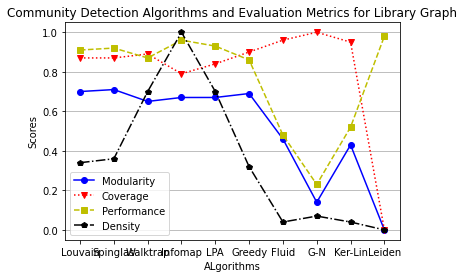

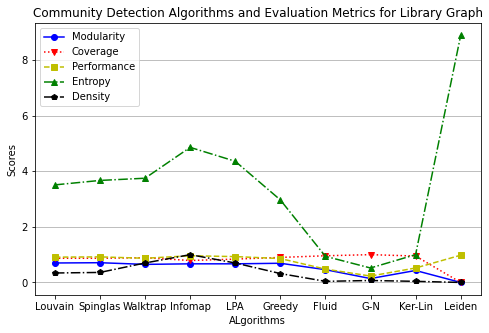

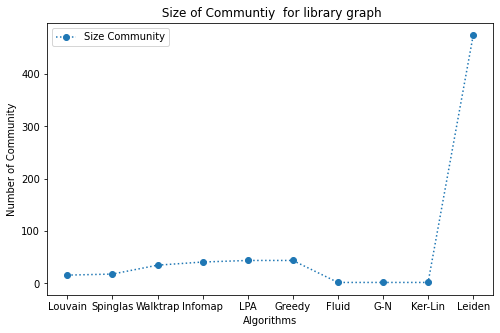

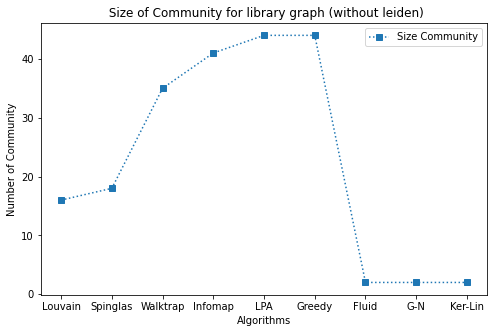

In [23]:
#completed graphic
import matplotlib.pyplot as plt

from matplotlib.figure import Figure
f = Figure( figsize =(7,7) )
labels1 = ['Louvain','Spinglas','Walktrap','Infomap', 'LPA','Greedy','Fluid','G-N','Ker-Lin','Leiden']
labels2 = ['Louvain','Spinglas','Walktrap','Infomap', 'LPA','Greedy','Fluid','G-N','Ker-Lin']

# plot all minus size and entropy

#plt.figure(figsize=[8,5])
plt.plot(labels1, Modlib_student,c="b",marker="o", label = "Modularity", linestyle="solid")
plt.plot(labels1, Covlib_student,c="r",marker="v", label = "Coverage", linestyle="dotted")
plt.plot(labels1, Perlib_student,c="y",marker="s", label = "Performance", linestyle="dashed")
#plt.plot(labels1, Entlib_student,c="g",marker="^", label = "Entropy", linestyle="dashdot")
plt.plot(labels1, Denlib_student,c="k",marker="p", label = "Density", linestyle="-.")
plt.title('Community Detection Algorithms and Evaluation Metrics for Library Graph')
plt.xlabel('ALgorithms')
plt.ylabel('Scores')
plt.grid(axis = 'y')
plt.legend()
plt.show()

# plot all minus size
plt.figure(figsize=[8,5])
plt.plot(labels1, Modlib_student,c="b",marker="o", label = "Modularity", linestyle="solid")
plt.plot(labels1, Covlib_student,c="r",marker="v", label = "Coverage", linestyle="dotted")
plt.plot(labels1, Perlib_student,c="y",marker="s", label = "Performance", linestyle="dashed")
plt.plot(labels1, Entlib_student,c="g",marker="^", label = "Entropy", linestyle="dashdot")
plt.plot(labels1, Denlib_student,c="k",marker="p", label = "Density", linestyle="-.")
plt.title('Community Detection Algorithms and Evaluation Metrics for Library Graph')
plt.xlabel('ALgorithms')
plt.ylabel('Scores')
plt.grid(axis = 'y')
plt.legend()
plt.show()

# plot lines size 
plt.figure(figsize=[8,5])
plt.plot(labels1,Sizelib_student,marker="o", label = "Size Community", linestyle="dotted")
plt.title(' Size of Communtiy  for library graph')
plt.xlabel('Algorithms')
plt.ylabel('Number of Community')
plt.legend()
plt.show()


# plot lines size without leiden
plt.figure(figsize=[8,5])
plt.plot(labels2, Sizelib_studentminLei,marker="s", label = "Size Community", linestyle="dotted")
plt.title(' Size of Community for library graph (without leiden)')
plt.xlabel('Algorithms')
plt.ylabel('Number of Community')
plt.legend()
plt.show()

#community distribution

In [25]:
#save label
labels = ['Louvain','Spinglas','Walktrap','Infomap', 'LPA','Greedy','Fluid','G-N','Ker-Lin','Leiden']
with open('/content/labelstudent.json', 'w') as f: 
      json.dump(labels,f)

{'0': 0, '1': 5, '2': 2, '3': 3, '4': 3, '5': 5, '6': 4, '7': 2, '8': 3, '9': 2, '10': 2, '11': 5, '12': 5, '13': 2, '14': 3, '15': 4, '16': 2, '17': 0, '18': 5, '19': 4, '20': 5, '21': 3, '22': 4, '23': 3, '24': 4, '25': 0, '26': 5, '27': 4, '28': 3, '29': 5, '30': 2, '31': 5, '32': 2, '33': 4, '34': 6, '35': 5, '36': 5, '37': 2, '38': 4, '39': 2, '40': 0, '41': 3, '42': 5, '43': 5, '44': 5, '45': 3, '46': 0, '47': 5, '48': 5, '49': 2, '50': 0, '51': 2, '52': 7, '53': 5, '54': 3, '55': 5, '56': 3, '57': 5, '58': 5, '59': 5, '60': 2, '61': 5, '62': 2, '63': 2, '64': 2, '65': 5, '66': 9, '67': 2, '68': 10, '69': 2, '70': 5, '71': 5, '72': 0, '73': 4, '74': 0, '75': 5, '76': 4, '77': 5, '78': 2, '79': 3, '80': 10, '81': 11, '82': 4, '83': 5, '84': 2, '85': 11, '86': 5, '87': 10, '88': 5, '89': 10, '90': 5, '91': 7, '92': 2, '93': 5, '94': 4, '95': 6, '96': 2, '97': 4, '98': 10, '99': 6, '100': 10, '101': 2, '102': 4, '103': 2, '104': 4, '105': 5, '106': 5, '107': 7, '108': 4, '109': 3, '

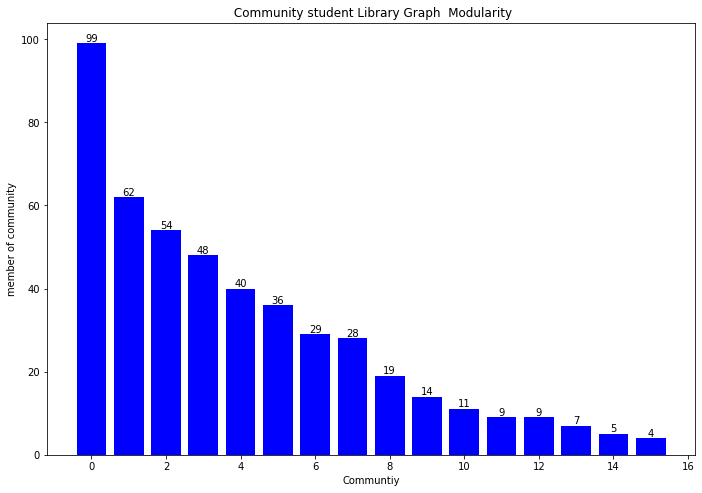

In [26]:
#distribusi community with CD louvain
print(partlou)
comlou=part2com(partlou)
print(comlou)

no_com=[i for i in range(len(comlou))]
c=[len(n) for n in comlou.values()]
com= sorted(c, reverse=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(no_com,com,width=0.8,color='blue')
for i in range(len(no_com)):
  plt.text(i,com[i],com[i],ha="center",va="bottom")
plt.xlabel("Communtiy")
plt.ylabel("member of community")
plt.title(" Community student Library Graph  Modularity")
plt.show()

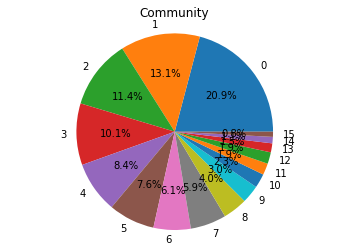

In [27]:
# pie chart form
my_labels=[i for i in range(len(no_com))]
import matplotlib.pyplot as plt
plt.pie(com,labels=my_labels,autopct='%1.1f%%')
plt.title('Community')
plt.axis('equal')
plt.show()

In [ ]:
#Analysis each comunity
#find the most populer element(maximal degree)
#for i in range(len(com)): print(com[i],gstudent.degree[com[i]])
ldens=[]
for i in range(len(comlou)):
  print("community ke :",i)
  lcom=comlou[i]
  print("size community :",len(lcom))
  #make com as subgraph from gstudent
  gcom=gstudent.subgraph(lcom) 
  dens=nx.density(gcom)
  ldens.append(dens)
  print("density of  community {:.2f}".format(dens))
  #list degree
  ldegree=[]
  #print("degree :",gstudent.degree[lcom[0]])
  for i in range(len(lcom)):
    ldegree.append(gstudent.degree[lcom[i]])
  #print(ldegree)
  #buat dictionary elemen_deg
  dict_node_deg={}
  for i in range(len(lcom)):
    dict_node_deg[lcom[i]]=ldegree[i]
  #print("dict node and_degree :",dict_node_deg)
  max_nostudent=max(dict_node_deg, key=dict_node_deg.get)
  maxdeg_nostudent=max(dict_node_deg.values())
  max_namestudent=[name for name,no in mapstudent.items() if no==max_nostudent]
  print("Buku terpopuler :",max_namestudent,", degree :",max(dict_node_deg.values()))
print("list density :",ldens)
print("average density :",np.average(ldens))
print("standard deviasi density :",np.std(ldens))
  

## Draw graph_book dengan size node berbeza

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.axis("off")
pos=nx.spring_layout(gstudent)
alpha=0.5
K = 100 # Scale factor
d = nx.degree(gstudent) 
d = [d[node]*K for node in gstudent.nodes()]
nx.draw_networkx_nodes(gstudent,pos,cmap=plt.cm.RdYlBu,node_color=list(part.values()))#node_size=d)
nx.draw_networkx_edges(gstudent,pos)
#nx.draw_networkx_labels(gs_x,pos)
plt.show()

# Graph Students


In [ ]:
gstudents=bipartite.projected_graph(gs,students)
print(gstudents.nodes(data=True))
print(gstudents.edges(data=True))

#draw graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axis("off")
attr=nx.get_node_attributes(gstudents,"attr")
pos=nx.spring_layout(gstudents)
nx.draw_networkx_nodes(gstudents,pos,cmap=plt.cm.RdYlBu,node_color='blue')
nx.draw_networkx_edges(gstudents,pos)
#nx.draw_networkx_labels(gstudents,pos,attr)
plt.show()

In [ ]:
#property 
print("property Student graph :")
print("number of edges :",nx.number_of_edges(gstudents))
print("number of nodes :",nx.number_of_nodes(gstudents))
print("density :{:.2f}".format(nx.density(gstudents)) )
print("diameter :",nx.diameter(gstudents) )
print("maximum degree :",max_degree(gstudents) )
print("minimum degree :",min_degree(gstudents) )
print("Average degree :{:.2f}".format(avg_degree(gstudents)))
print("Assortativity :{:.2f}".format(nx.degree_assortativity_coefficient(gstudents)))
r=sum(nx.triangles(gstudents).values()) / 3
print("Number of triangles",r)
print("Graph is connected :?",nx.is_connected(gstudents)) 
print("Number of connected components :",nx.number_connected_components(gstudents))



In [ ]:
degree_dict=dict(gstudents.degree(gstudents.nodes()))
print(degree_dict)
nx.set_node_attributes(gstudents,degree_dict,'degree')
attr=nx.get_node_attributes(gstudents,"attr")
sorted_degree=sorted(degree_dict.items(),key=itemgetter(1),reverse=True)
print(sorted_degree)
print(" 10 top nodes by degree")
for x,y in sorted_degree[:10]:
    print(x,y)
    print(attr[x])

In [ ]:
#show students dan departement paling rajin pinjam buku
print(Most_top_students(gstudents,10))

#Students degree distribution

In [ ]:
degree_dict=dict(gstudents.degree(gstudents.nodes()))
#nx.set_node_attributes(g,degree_dict,'degree')
sorted_degree=sorted(degree_dict.items(),key=itemgetter(1),reverse=True)
students=[]
deg_students=[]
for i in range(len(sorted_degree)):
  students.append(sorted_degree[i][0])
  deg_students.append(sorted_degree[i][1])
no=[i for i in range(len(sorted(students)))]
plt.figure(figsize=(7,7))
plt.bar(no,deg_students, color='blue')
plt.title('Distribution of students degree', fontsize=14)
plt.xlabel('No of Students', fontsize=14)
plt.ylabel('Degree of Students', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Frequency distribution
import collections
degree=dict(gstudents.degree(gstudents.nodes()))
list_deg=list(degree.values())
counter=collections.Counter(list_deg)
x=list(counter.values())
y=list(counter.keys())
plt.figure(figsize=(7,7))
plt.bar(x,y, color='blue')
plt.title('Frequency Distribution of students degree', fontsize=14)
plt.xlabel('Degree of students', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Aply EVA (selected for node attributed)

In [ ]:
# mapping dan relabeling
mapstudents=dict(zip(gstudents,range(0,len(gstudents))))
gstudents=nx.relabel_nodes(gstudents,mapstudents)
nx.set_edge_attributes(gstudents,values=1,name='weight')
print(gstudents.nodes(data=True))
print(gstudents.edges(data=True))

nx.write_gml(gstudents,'/content/gdrive/MyDrive/data set/uad library/gstudents-sac1.gml')
nx.write_gpickle(gstudents,'/content/gdrive/MyDrive/data set/uad library/gstudents.pickle')


In [ ]:

nx.write_gml(gstudents,'/content/gdrive/MyDrive/data set/uad library/gstudents.gml')
nx.write_gpickle(gstudents,'/content/gdrive/MyDrive/data set/uad library/gstudents.pickle')

modl=[]
purl=[]
from Eva import eva_best_partition,modularity,purity
for alpha in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
  part,com_labels=eva_best_partition(gstudents,alpha=alpha) 
  pur=purity(com_labels)
  mod=modularity(part,gstudents)
  print("alpha :",alpha)
  print("purity, P: ",pur)
  mod=modularity(part,gstudents)
  print("modularity Q : ",mod)
  modl.append(mod)
  purl.append(pur)
print(modl)
print(purl)

In [ ]:
#trade-off modularity and purity (tunning parameter) 
import numpy as np
modl=np.around(modl,2)
purl=np.around(purl,2)
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y1=modl
y2=purl
plt.plot(x,y1,label='Modularity')
plt.plot(x,y2,label='Purity')
plt.plot()
plt.xlabel("alpha")
plt.ylabel("values")
plt.title("modularity vs purity")
plt.show()

# optimal solutian, with alpha = 0.5

In [ ]:
#calculate modularity
Modlib_student=[]
from Eva import eva_best_partition,modularity,purity
alpha=0.5
part,com_labels=eva_best_partition(gstudents,alpha=alpha) 
pur=purity(com_labels)
mod=modularity(part,gstudents)
print("purity, P: ",pur)
mod=modularity(part,gstudents)
print("modularity Q : ",mod)
Modlib_student.append(mod)
#compare with another CD 
from community import community_louvain
#first compute the best partition
part = community_louvain.best_partition(gstudents)
print("number of node : ",len(part))
mod=community_louvain.modularity(part,gstudents)
Modlib_student.append(mod)
print("modularity Q : ",mod)
#greedy_modularity_communities algorithm
import networkx.algorithms.community as nx_comm
comk=nx_comm.greedy_modularity_communities(gstudents)
print("com greedy :",list(comk))
mod=nx_comm.modularity(gstudents,comk)
#print("modularity Greey CN:",mod)
Modlib_student.append(mod)
# LPA algorithm
import networkx.algorithms.community as nx_comm
comk=nx_comm.label_propagation_communities(gstudents)
#print(list(comk))
mod=nx_comm.modularity(gstudents,comk)
print("modularity LPA:",mod)
Modlib_student.append(mod)
#Fluid Communities algorithm
import networkx.algorithms.community as nx_comm
comf=nx_comm.asyn_fluidc(gstudents,2)
#print(list(comf))
mod=nx_comm.modularity(gstudents,nx_comm.asyn_fluidc(gstudents,2))
print("modularity fluid algorithm :",mod)
Modlib_student.append(mod)
import networkx.algorithms.community as nx_comm
comk=nx_comm.kernighan_lin_bisection(gstudents)
#print(list(comk))
mod=nx_comm.modularity(gstudents,comk)
print("modularity Kernighan:",mod)
Modlib_student.append(mod)
#Girvan_newman ALgorithm
import networkx.algorithms.community as nx_comm
com=nx_comm.girvan_newman(gstudents)
top_level_com=next(com)
mod=nx_comm.modularity(gstudents,top_level_com)
print("modularity girvan_newman :",mod)
Modlib_student.append(mod)
#Kernighan_Lin Bisection algorithm

      

In [ ]:
#tambahan SAC1 and MCL


In [ ]:
import numpy as np
Md_s=np.around(Modlib_student,2)
print(Md_s)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Algorithm = ['Eva-05','Louvain','Greedy CNM', 'LPA','Fluid-Com','Ker-Lin','Girvan-Newman']
ax.bar(Algorithm,Md_s,width=0.8,color='yellow')
for i in range(len(Algorithm)):
  plt.text(i,Md_s[i],Md_s[i],ha="center",va="bottom")
plt.xlabel("algorithm")
plt.ylabel("modularity")
plt.title("Student-Library Graph  Modularity ")
plt.show()


In [ ]:
#terpilih eva-05
from Eva import eva_best_partition,modularity,purity
alpha=0.5
parteva,com_labels=eva_best_partition(gstudents,alpha=alpha) 
pur=purity(com_labels)
mod=modularity(part,gstudents)
print("number of the part is, : ",len(parteva))
com=part2com(parteva)
print("number of the com is, : ",len(com))
print("the number of community labes is, : ",len(com_labels))
print(com)
print(com_labels)

In [ ]:
#distribusi  community
#community and membership

comeva=part2com(parteva)
no_com=[i for i in range(len(comeva))]
c=[len(n) for n in comeva.values()]
com= sorted(c, reverse=True)

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(no_com,com,width=0.8,color='blue')
for i in range(len(no_com)):
  plt.text(i,com[i],com[i],ha="center",va="bottom")
plt.xlabel("Communtiy")
plt.ylabel("member of community")
plt.title(" Community Students Library Graph  Modularity using EVA-05 ")
plt.show()

In [ ]:
#distribusi community dg pie chart
my_labels=[i for i in range(len(no_com))]
import matplotlib.pyplot as plt
plt.pie(com,labels=my_labels,autopct='%1.1f%%')
plt.title('Distribution of Community of Gstudents ')
plt.axis('equal')
plt.show()

# Evaluation All Metrics GStudents

In [ ]:

#eva
from Eva import eva_best_partition,modularity,purity
alpha=0.5
part,com_labels=eva_best_partition(gstudents,alpha=alpha) 
pur=purity(com_labels)
modeva=modularity(part,gstudents)
comeva=part2com(part)
partition=com2lsetcom(comeva)
covrgeva=nx_comm.coverage(gstudents,partition)
performeva=nx_comm.performance(gstudents,partition)
labels=[y for x,y in part.items()]
eeva=entropy(labels)
sizeeva=len(comeva)
deva=[]
for i in range(sizeeva):
  lcom=comeva[i]
  gcom=gstudents.subgraph(lcom) 
  de=nx.density(gcom)
  deva.append(de)
avgdeva=np.average(deva)

#louvain
part = community_louvain.best_partition(gstudents)
labels=[y for x,y in part.items()]
elou=entropy(labels)
com=part2com(part)
partition=com2lsetcom(com)
sizelou=len(com)
modlou=community_louvain.modularity(part,gstudents)
covrglou=nx_comm.coverage(gstudents,partition)
performlou=nx_comm.performance(gstudents,partition)
dlou=[]
for i in range(sizelou):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  dl=nx.density(gcom)
  dlou.append(dl)
avgdlou=np.average(dlou)


#greedy_modularity_communities algorithm
import networkx.algorithms.community as nx_comm
comg=nx_comm.greedy_modularity_communities(gstudents)
com=frozen2com(comg)
part=com2part(com)
labels=[y for x,y in part.items()]
egre=entropy(labels)
modgre=nx_comm.modularity(gstudents,comg)
covrggre=nx_comm.coverage(gstudents,comg)
performgre=nx_comm.performance(gstudents,comg)
sizegre=len(comg)
dgre=[]
for i in range(sizegre):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  dg=nx.density(gcom)
  dgre.append(dg)
avgdgre=np.average(dgre)

#LPA
import networkx.algorithms.community as nx_comm
#appy cd algorithms ex : louvaui
coml=nx_comm.label_propagation_communities(gstudents)
lcom=[i for i in coml]
ll=list_set2list_list(lcom)
com=list_list2com(ll)
part=com2part(com)
labels=[y for x,y in part.items()]
elpa=entropy(labels)
modlpa=nx_comm.modularity(gstudents,lcom)
covrglpa=nx_comm.coverage(gstudents,lcom)
performlpa=nx_comm.performance(gstudents,lcom)
sizelpa=len(lcom)
dlpa=[]
for i in range(sizelpa):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  dl=nx.density(gcom)
  dlpa.append(dl)
avgdlpa=np.average(dlpa)

#Fluid Communities algorithm
comf=nx_comm.asyn_fluidc(gstudents,2)
z=list(comf)
x=list_set2list_list(z)
com=list_list2com(x)
part=com2part(com)
labels=[y for x,y in part.items()]
eflu=entropy(labels)
modflu=nx_comm.modularity(gstudents,nx_comm.asyn_fluidc(gstudents,2))
covrgflu=nx_comm.coverage(gstudents,z)
performflu=nx_comm.performance(gstudents,z)
sizeflu=len(z)
dflu=[]
for i in range(sizeflu):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  df=nx.density(gcom)
  dflu.append(df)
avgdflu=np.average(dflu)
#Girvan_newman ALgorithm
comg=nx_comm.girvan_newman(gstudents)
top_level_com=next(comg)
ll=list_set2list_list(top_level_com)
com=list_list2com(ll)
part=com2part(com)
labels=[y for x,y in part.items()]
egir=entropy(labels)
modgir=nx_comm.modularity(gstudents,top_level_com)
covrggir=nx_comm.coverage(gstudents,top_level_com)
performgir=nx_comm.performance(gstudents,top_level_com)
sizegir=len(top_level_com)
dgir=[]
for i in range(sizegir):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  dg=nx.density(gcom)
  dgir.append(dg)
avgdgir=np.average(dgir)

#Kernighan_Lin Bisection algorithm
comk=nx_comm.kernighan_lin_bisection(gstudents)
x=list_set2list_list(list(comk))
y=list_list2com(x)
part=com2part(y)
labels=[y for x,y in part.items()]
eker=entropy(labels)
modker=nx_comm.modularity(gstudents,comk)
covrgker=nx_comm.coverage(gstudents,comk)
performker=nx_comm.performance(gstudents,comk)
sizeker=len(comk)
dker=[]
for i in range(sizeker):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  dk=nx.density(gcom)
  dker.append(dk)
avgdker=np.average(dker)
#from igraph
igstudents=ig.Graph.from_networkx(gstudents)
cominf=igstudents.community_infomap()
mem=cominf.membership
part=mem2part(mem)
com=part2com(part)
partition=com2lsetcom(com)
labels=[y for x,y in part.items()]
einf=entropy(labels)
modinf=igstudents.modularity(cominf)
covrginf=nx_comm.coverage(gstudents,partition)
performinf=nx_comm.performance(gstudents,partition)
sizeinf=len(cominf)
dinf=[]
for i in range(sizeinf):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  di=nx.density(gcom)
  dinf.append(di)
avgdinf=np.average(dinf)

comlei=igstudents.community_leiden()
mem=comlei.membership
part=mem2part(mem)
com=part2com(part)
partition=com2lsetcom(com)
sizelei=len(comlei)
modlei=igstudents.modularity(comlei)
covrglei=nx_comm.coverage(gstudents,partition)
performlei=nx_comm.performance(gstudents,partition)
labels=[y for x,y in part.items()]
elei=entropy(labels)
dlei=[]
for i in range(sizelei):
  lcom=com[i]
  gcom=gstudents.subgraph(lcom) 
  dl=nx.density(gcom)
  dlei.append(dl)
avgdlei=np.average(dlei)

print("Walktrap")
wal=igstudents.community_walktrap()
#g.community_walktrap().as_clustering().membership
comwal=wal.as_clustering()
mem=comwal.membership
part=mem2part(mem)
com=mem2com(mem)
partition=com2lsetcom(com)
sizewal=len(comwal)
modwal=igstudents.modularity(comwal)
covrgwal=nx_comm.coverage(gstudents,partition)
performwal=nx_comm.performance(gstudents,partition)
labels=[y for x,y in part.items()]
ewal=entropy(labels)
dwal=[]
for i in range(sizewal):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom) 
  dw=nx.density(gcom)
  dwal.append(dw)
avgdwal=np.average(dwal)
print("modularity : ",modwal)
print("size com :",sizewal)
print("coverage : ",covrgwal)
print("performan  :",performwal)
print("entropy  :",ewal)
print("avg density  :",avgdwal)

print("Spinglas")
comspi=igstudents.community_spinglass()
mem=comspi.membership
part=mem2part(mem)
com=mem2com(mem)
partition=com2lsetcom(com)
sizespi=len(comspi)
modspi=igstudents.modularity(comspi)
covrgspi=nx_comm.coverage(gstudents,partition)
performspi=nx_comm.performance(gstudents,partition)
labels=[y for x,y in part.items()]
espi=entropy(labels)
dspi=[]
for i in range(sizespi):
  lcom=com[i]
  gcom=gstudent.subgraph(lcom) 
  ds=nx.density(gcom)
  dspi.append(ds)
avgdspi=np.average(dspi)
print("modularity : ",modspi)
print("size com :",sizespi)
print("coverage : ",covrgspi)
print("performan  :",performspi)
print("entropy  :",espi)
print("avg density  :",avgdspi)
Modlib_students=[]
Covlib_students=[]
Perlib_students=[]
Sizelib_students=[]
Entlib_students=[]
Denlib_students=[]
for i in [modeva,modlou,modspi,modwal,modinf,modlpa,modgre,modflu,modgir,modker,modlei]:
  Modlib_students.append(np.around(i,2))
for i in [sizeeva,sizelou,sizespi,sizewal,sizeinf,sizelpa,sizegre,sizeflu,sizegir,sizeker,sizelei]:
  Sizelib_students.append(np.around(i,2))
Sizelib_studentsminLei=[]
for i in [sizeeva,sizelou,sizespi,sizewal,sizeinf,sizelpa,sizegre,sizeflu,sizegir,sizeker]:
  Sizelib_studentsminLei.append(np.around(i,2))
for i in [covrgeva,covrglou,covrgspi,covrgwal,covrginf,covrglpa,covrggre,covrgflu,covrggir,covrgker,covrglei]:
  Covlib_students.append(np.around(i,2))
for i in [performeva,performlou,performspi,performwal,performinf,performlpa,performgre,performflu,performgir,performker,performlei]:
  Perlib_students.append(np.around(i,2))
for i in [eeva,elou,espi,ewal,einf,elpa,egre,eflu,egir,eker,elei]:
  Entlib_students.append(np.around(i,2))
for i in [avgdeva,avgdlou,avgdspi,avgdwal,avgdinf,avgdlpa,avgdgre,avgdflu,avgdgir,avgdker,avgdlei]:
  Denlib_students.append(np.around(i,2))
print("Modularity :",Modlib_students)
print("Size com :",Sizelib_students)
print("Coverage :",Covlib_students)
print("Performance :",Perlib_students)
print("Entropy :",Entlib_students)
print("Density :",Denlib_students)



In [ ]:
#save to file
#save to json and txt
import json
with open('/content/gdrive/MyDrive/data set/uad library/modstudents.json', 'w') as f: 
      json.dump(Modlib_students,f)
with open('/content/gdrive/MyDrive/data set/uad library/covstudents.json', 'w') as f: 
      json.dump(Covlib_students,f)
with open('/content/gdrive/MyDrive/data set/uad library/perstudents.json', 'w') as f: 
      json.dump(Perlib_students,f)
with open('/content/gdrive/MyDrive/data set/uad library/denstudents.json', 'w') as f: 
      json.dump(Denlib_students,f)
with open('/content/gdrive/MyDrive/data set/uad library/entstudents.json', 'w') as f: 
      json.dump(Entlib_students,f)
with open('/content/gdrive/MyDrive/data set/uad library/sizestudents.txt', 'w') as file:
        file.write('\n'.join(str(s) for s in Sizelib_students))

In [ ]:
#completed graphic Gstudents
labels1 = ['Eva','Louvain','Spinglas','Walktrap','Infomap', 'LPA','Greedy','Fluid','G-N','Ker-Lin','Leiden']
labels2 = ['Eva','Louvain','Spinglas','Walktrap','Infomap', 'LPA','Greedy','Fluid','G-N','Ker-Lin']

# plot all minus size and entropy

plt.figure(figsize=[8,5])
plt.plot(labels1, Modlib_students,c="b",marker="o", label = "Modularity", linestyle="solid")
plt.plot(labels1, Covlib_students,c="r",marker="v", label = "Coverage", linestyle="dotted")
plt.plot(labels1, Perlib_students,c="y",marker="s", label = "Performance", linestyle="dashed")
#plt.plot(labels1, Entlib_students,c="g",marker="^", label = "Entropy", linestyle="dashdot")
plt.plot(labels1, Denlib_students,c="k",marker="p", label = "Density", linestyle="-.")
plt.title('Community Detection Algorithms and Evaluation Metrics for Students Library Graph')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.grid(axis = 'y')
plt.legend()
plt.show()

In [ ]:
#save label
labels_students = ['Eva','Louvain','Spinglas','Walktrap','Infomap', 'LPA','Greedy','Fluid','G-N','Ker-Lin','Leiden']
with open('/content/gdrive/MyDrive/data set/uad library/labelstudents.json', 'w') as f: 
      json.dump(labels_students,f)

In [ ]:

# plot all minus size
plt.figure(figsize=[8,5])
plt.plot(labels1, Modlib_students,c="b",marker="o", label = "Modularity", linestyle="solid")
plt.plot(labels1, Covlib_students,c="r",marker="v", label = "Coverage", linestyle="dotted")
plt.plot(labels1, Perlib_students,c="y",marker="s", label = "Performance", linestyle="dashed")
plt.plot(labels1, Entlib_students,c="g",marker="^", label = "Entropy", linestyle="dashdot")
plt.plot(labels1, Denlib_students,c="k",marker="p", label = "Density", linestyle="-.")
plt.title('Community Detection Algorithms and Evaluation Metrics for Library Graph')
plt.xlabel('ALgorithms')
plt.ylabel('Scores')
plt.grid(axis = 'y')
plt.legend()
plt.show()

# plot lines size 
plt.figure(figsize=[8,5])
plt.plot(labels1,Sizelib_students,marker="o", label = "Size Community", linestyle="dotted")
plt.title(' Size of Communtiy  for library graph')
plt.xlabel('Algorithms')
plt.ylabel('Number of Community')
plt.legend()
plt.show()


# plot lines size without leiden
plt.figure(figsize=[8,5])
plt.plot(labels2, Sizelib_studentsminLei,marker="s", label = "Size Community", linestyle="dotted")
plt.title(' Size of Community for library graph (without leiden)')
plt.xlabel('Algorithms')
plt.ylabel('Number of Community')
plt.legend()
plt.show()

In [ ]:
#Analysis each community
print("number of community :",len(comeva))
  
#for all community
for i in range(len(comeva)):
  print("community ke :",i)
  lcom=comeva[i]
  print("number of member :",len(lcom))
  #make com as subgraph from students
  gcom=gstudents.subgraph(lcom)
  #print("com ke :",i,gcom.nodes(data=True)) 
  Most_top_students(gcom,1)
